In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [2]:
train = pd.read_csv('house_train.csv')
test = pd.read_csv('house_test.csv')
submission = pd.read_csv('house_sample_submission.csv')

# EDA

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print('The train data size before dropping Id column: {}'.format(train.shape))
print('The test data size before dropping Id column: {}'.format(test.shape))
train_id = train.Id
test_id = test.Id
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis = 1,inplace=True)
print('The train data size after dropping Id column : {}'.format(train.shape))
print('The test data size after dropping Id column : {}'.format(test.shape))

The train data size before dropping Id column: (1460, 81)
The test data size before dropping Id column: (1459, 80)
The train data size after dropping Id column : (1460, 80)
The test data size after dropping Id column : (1459, 79)


In [6]:
train.dtypes.value_counts().sort_values(ascending=False)

object     43
int64      34
float64     3
dtype: int64

- Checking Missing value

In [7]:
def missing_per(df):
    ms=pd.DataFrame(columns=['col','missing'])
    idx = 0
    for i in range(df.shape[1]):
        if df.isnull().sum()[i]>0:
            ms.loc[idx,'col'] = df.isnull().sum().index[i]
            ms.loc[idx,'missing'] = df.isnull().sum()[i]/df.shape[0] * 100
            idx+=1
        else:
            continue
    ms=ms.sort_values(by='missing',ascending=False)
    return ms

In [8]:
ms_train = missing_per(train) # missing value
ms_train

,col,missing
16,PoolQC,99.5205
18,MiscFeature,96.3014
1,Alley,93.7671
17,Fence,80.7534
10,FireplaceQu,47.2603
0,LotFrontage,17.7397
11,GarageType,5.54795
12,GarageYrBlt,5.54795
13,GarageFinish,5.54795
14,GarageQual,5.54795


Text(0.5, 1.0, 'train missing rate')

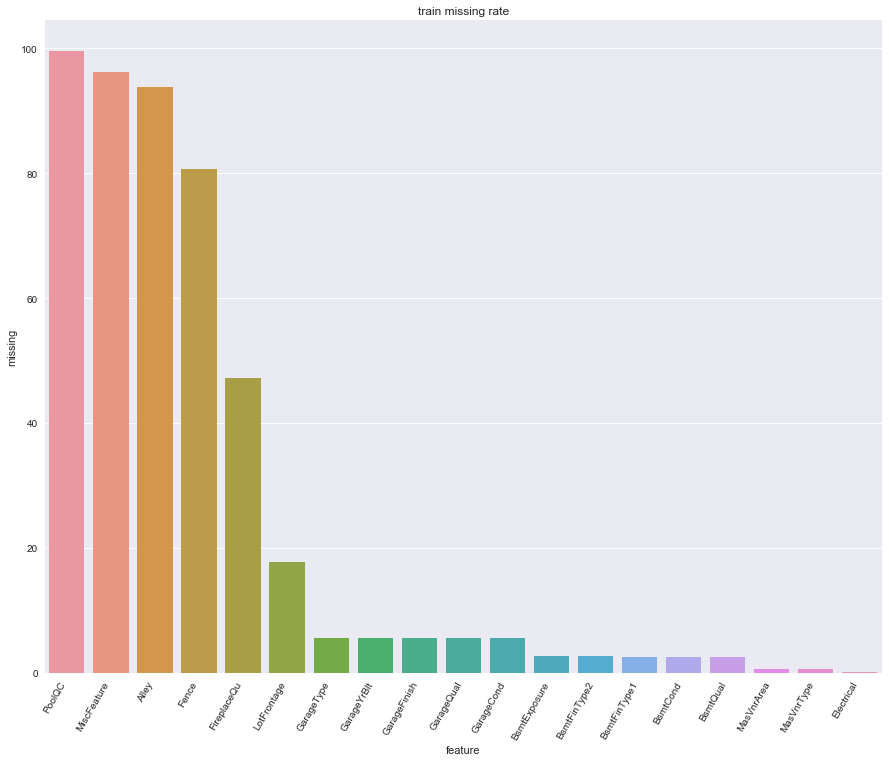

In [9]:
plt.figure(figsize=(15,12))
sns.barplot(data=ms_train,x='col',y='missing')
plt.xlabel('feature')
plt.xticks(rotation='60',ha='right')
plt.title('train missing rate')

In [10]:
ms_test = missing_per(test) # missing_value
ms_test

,col,missing
29,PoolQC,99.7944
31,MiscFeature,96.5045
2,Alley,92.6662
30,Fence,80.1234
21,FireplaceQu,50.0343
1,LotFrontage,15.5586
28,GarageCond,5.34613
23,GarageYrBlt,5.34613
27,GarageQual,5.34613
24,GarageFinish,5.34613


Text(0.5, 1.0, 'train missing rate')

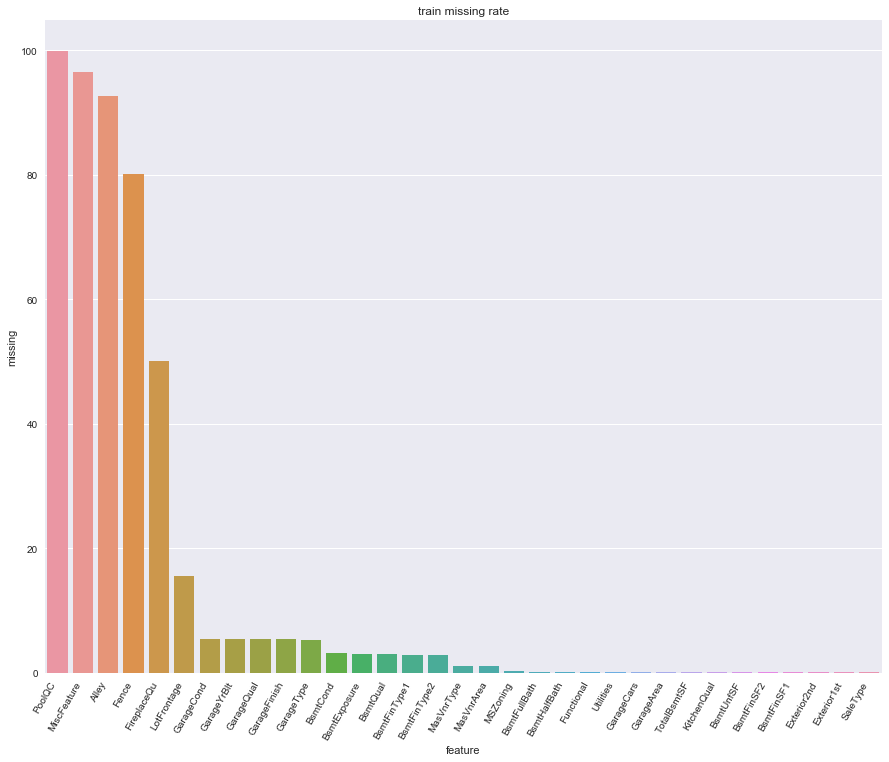

In [11]:
plt.figure(figsize=(15,12))
sns.barplot(data=ms_test,x='col',y='missing')
plt.xlabel('feature')
plt.xticks(rotation='60',ha='right')
plt.title('train missing rate')

Text(0.5, 1.0, 'SalePrice_GrLivArea correlation')

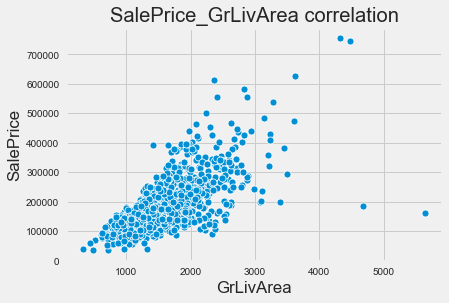

In [12]:
plt.style.use('fivethirtyeight')
sns.scatterplot(data=train,x='GrLivArea',y='SalePrice')
plt.title('SalePrice_GrLivArea correlation')

we can see outliers. we will remove outliers

Text(0.5, 1.0, 'SalePrice_GrLivArea correlation after removing outliers')

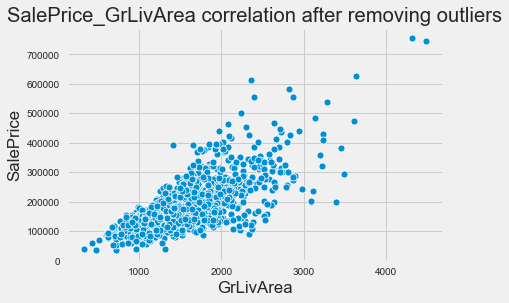

In [13]:
train= train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
sns.scatterplot(data=train,x='GrLivArea',y='SalePrice')
plt.title('SalePrice_GrLivArea correlation after removing outliers')

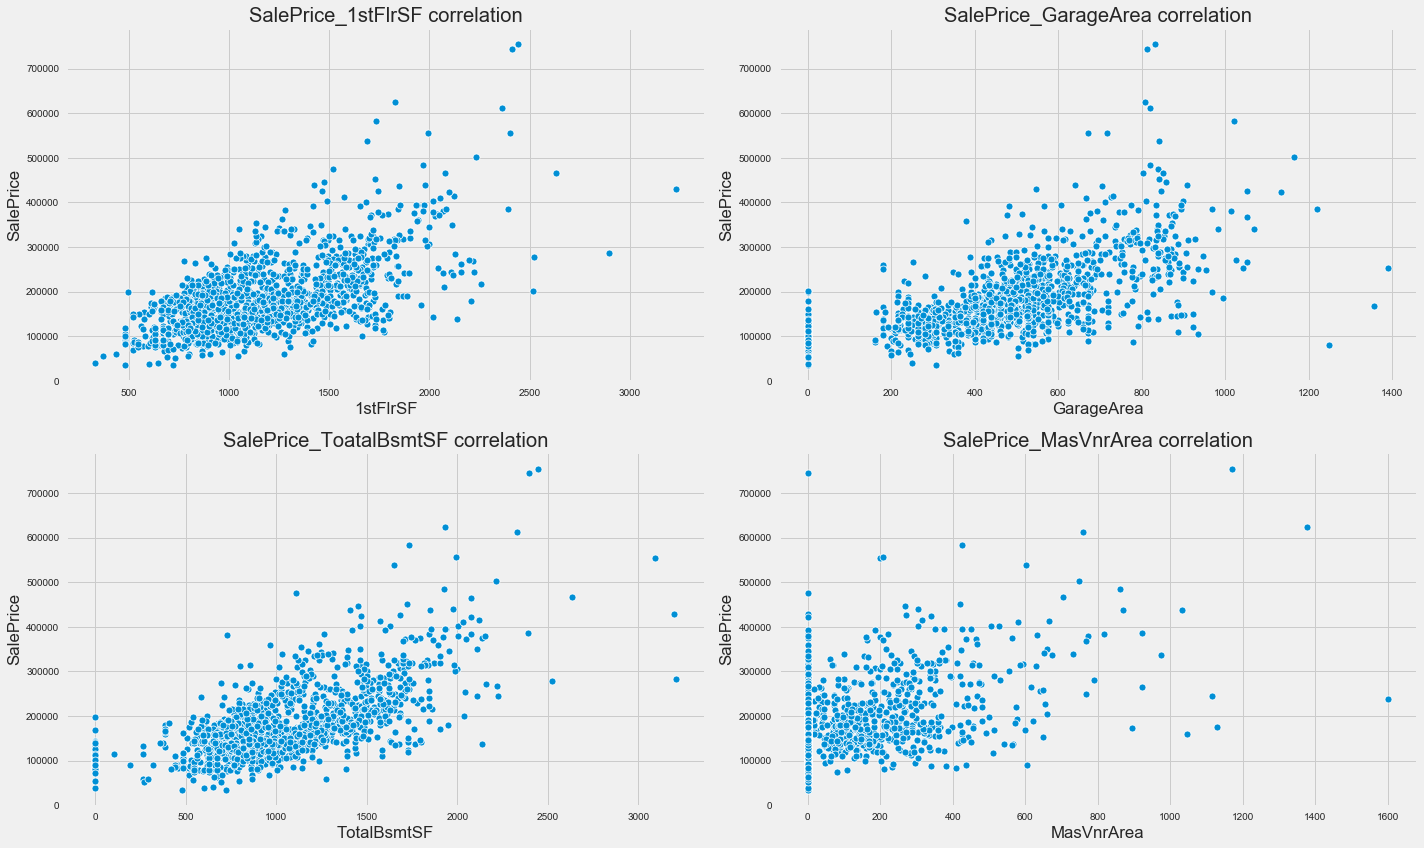

In [14]:
fig,axes = plt.subplots(2,2,figsize=(20,12)) 
sns.scatterplot(data=train,x='1stFlrSF',y='SalePrice',ax=axes[0,0])
axes[0,0].set(title='SalePrice_1stFlrSF correlation')
sns.scatterplot(data=train,x='GarageArea',y='SalePrice',ax=axes[0,1])
axes[0,1].set(title='SalePrice_GarageArea correlation')
sns.scatterplot(data=train,x='TotalBsmtSF',y='SalePrice',ax=axes[1,0])
axes[1,0].set(title='SalePrice_ToatalBsmtSF correlation')
sns.scatterplot(data=train,x='MasVnrArea',y='SalePrice',ax=axes[1,1])
axes[1,1].set(title='SalePrice_MasVnrArea correlation')
plt.tight_layout()

Looking at the graph, I thought it was mostly linear.

So, I will draw regplot.

[Text(0.5, 1.0, 'SalePrice_GrLivArea regrssion plot')]

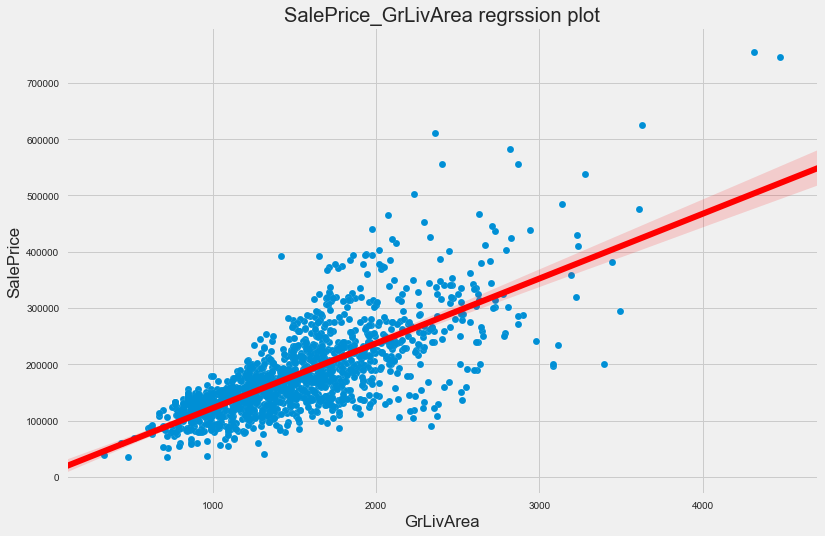

In [15]:
fig,ax1 = plt.subplots(figsize=(12,8))
sns.scatterplot(data=train,x='GrLivArea',y='SalePrice',ax=ax1)
sns.regplot(train['GrLivArea'],y=train['SalePrice'],line_kws={'color':'red'},ax=ax1)
ax1.set(title = 'SalePrice_GrLivArea regrssion plot')

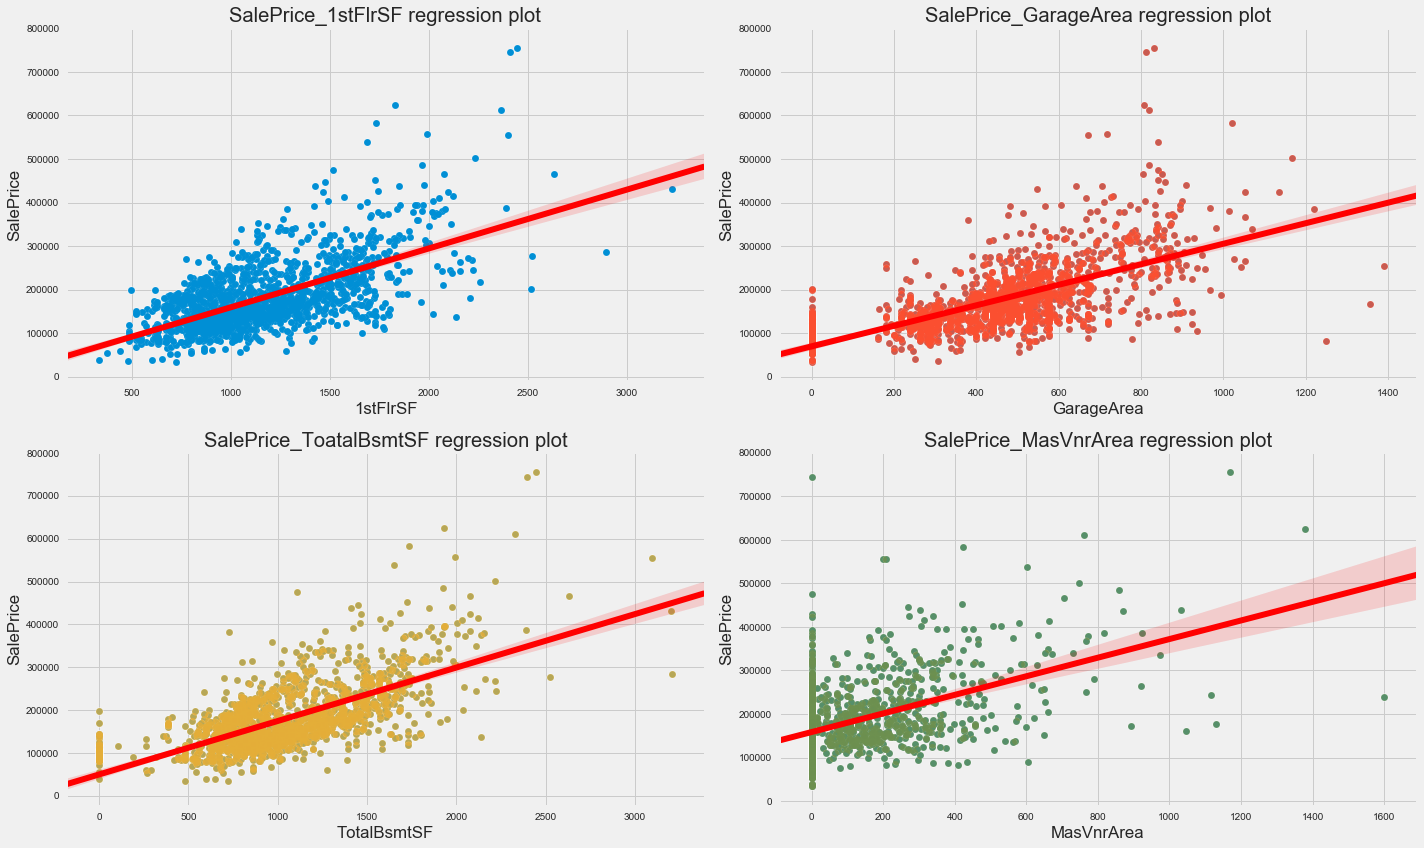

In [16]:
fig,axes = plt.subplots(2,2,figsize=(20,12)) 
sns.scatterplot(data=train,x='1stFlrSF',y='SalePrice',ax=axes[0,0])
sns.regplot(x=train['1stFlrSF'],y=train['SalePrice'],line_kws={'color':'red'},ax=axes[0,0])
axes[0,0].set(title='SalePrice_1stFlrSF regression plot')
sns.scatterplot(data=train,x='GarageArea',y='SalePrice',ax=axes[0,1])
sns.regplot(x=train['GarageArea'],y=train['SalePrice'],line_kws={'color':'red'},ax=axes[0,1])
axes[0,1].set(title='SalePrice_GarageArea regression plot')
sns.scatterplot(data=train,x='TotalBsmtSF',y='SalePrice',ax=axes[1,0])
sns.regplot(x=train['TotalBsmtSF'],y=train['SalePrice'],line_kws={'color':'red'},ax=axes[1,0])
axes[1,0].set(title='SalePrice_ToatalBsmtSF regression plot')
sns.scatterplot(data=train,x='MasVnrArea',y='SalePrice',ax=axes[1,1])
sns.regplot(x=train['MasVnrArea'],y=train['SalePrice'],line_kws={'color':'red'},ax=axes[1,1])
axes[1,1].set(title='SalePrice_MasVnrArea regression plot')
plt.tight_layout()

Text(0.5, 1, 'Heatmap of all the Features')

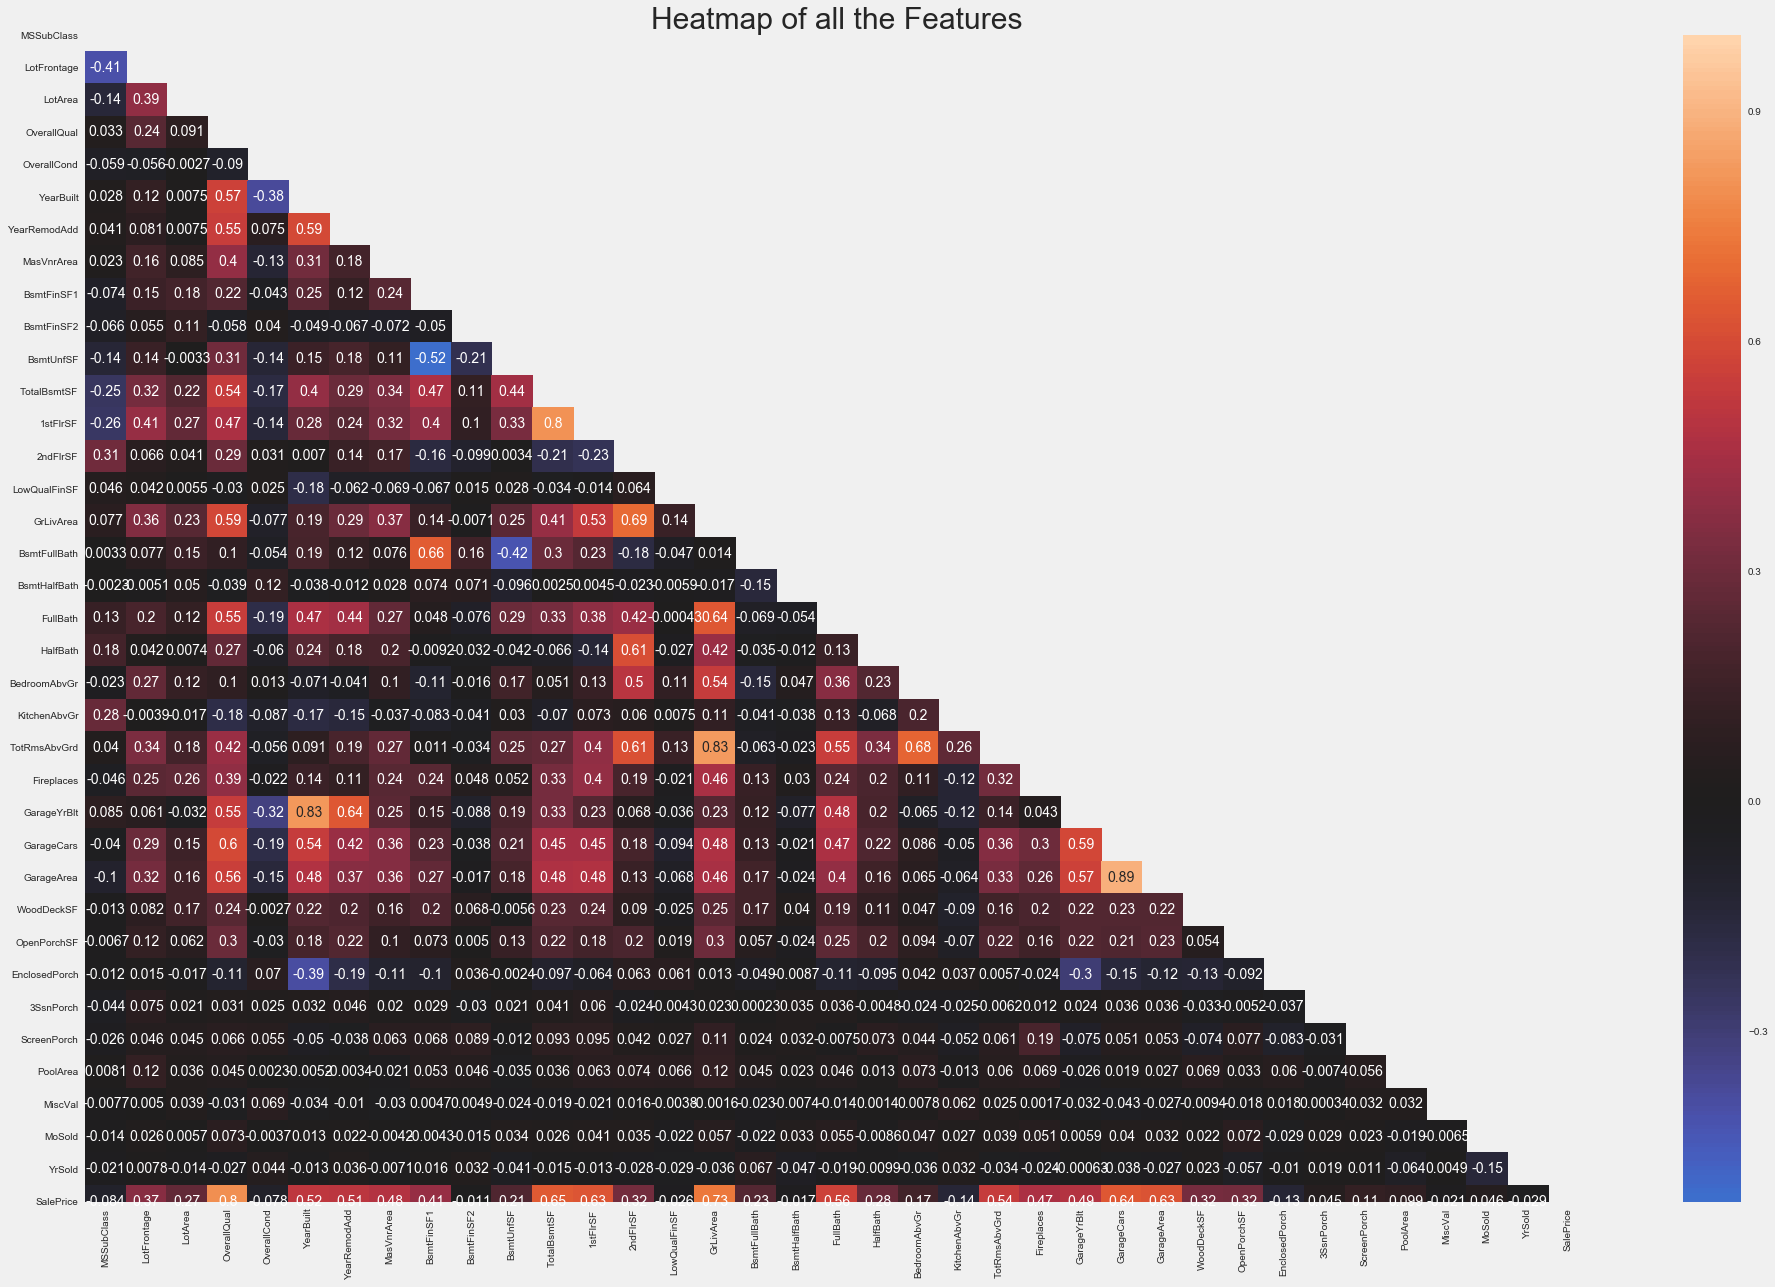

In [17]:
plt.figure(figsize=(30,20))
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train.corr(), annot=True, center = 0, mask=mask)
plt.title("Heatmap of all the Features", fontsize = 30)
#  cmap=sns.diverging_palette(20, 220, n=200),

- There is 83% correlation between **GarageYrBlt** and **YearBuilt**.
- 83% correlation between **TotRmsAbvGrd** and **GrLivArea**.
- 89% correlation between **GarageCars** and **GarageArea**.
- Similarly many other features such as **BsmtUnfSF**, **FullBath** have good correlation with other independent feature but not so much with the dependent feature.

# Feature Engineering

- Normalized 'SalePrice' feature

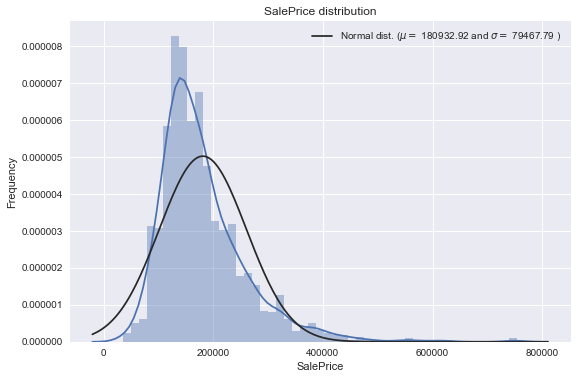

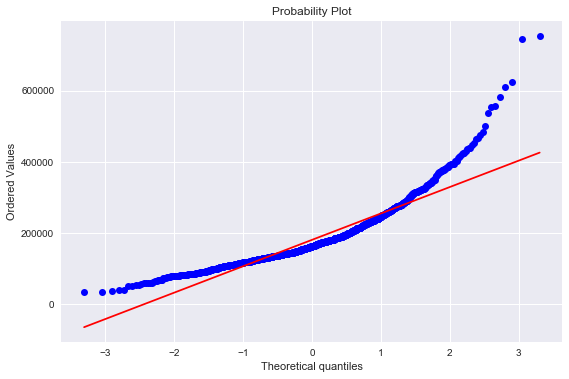

In [18]:
from scipy.stats import norm, skew
from scipy import stats
plt.style.use('seaborn')
sns.distplot(train['SalePrice'] , fit=norm)
mu, sigma = norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
stats.probplot(train['SalePrice'],plot=plt)
plt.show()

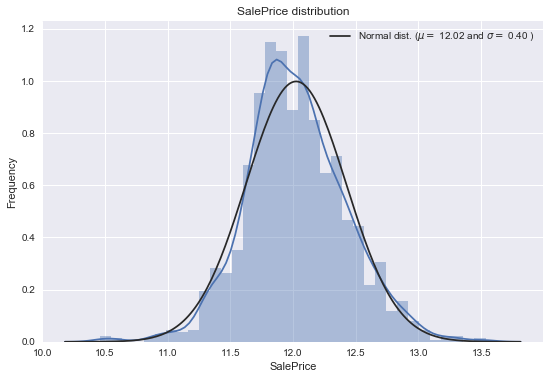

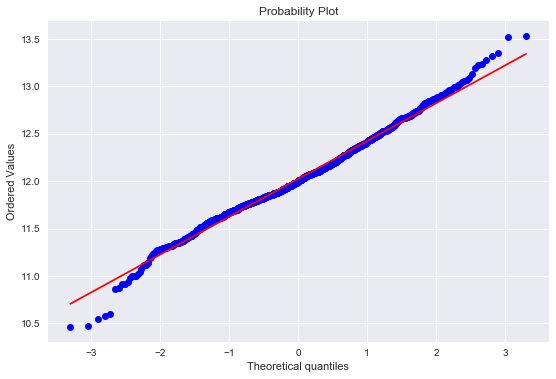

In [19]:
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'],fit=norm)
mu,sigma = norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
fig=plt.figure()
stats.probplot(train['SalePrice'],plot=plt)
plt.show()

In [20]:
ntrain = train.shape[0]
ntest = test.shape[0]
train_y= train['SalePrice'].values
data = pd.concat([train,test],join='inner')
print('Merging data size is {}'.format(data.shape))

Merging data size is (2917, 79)


- Missing value processing

In [21]:
ms_all = missing_per(data) # missing_values
ms_all

,col,missing
30,PoolQC,99.6915
32,MiscFeature,96.4004
2,Alley,93.2122
31,Fence,80.4251
22,FireplaceQu,48.6802
1,LotFrontage,16.661
25,GarageFinish,5.45081
28,GarageQual,5.45081
29,GarageCond,5.45081
24,GarageYrBlt,5.45081


Text(0.5, 1.0, 'All data missing values')

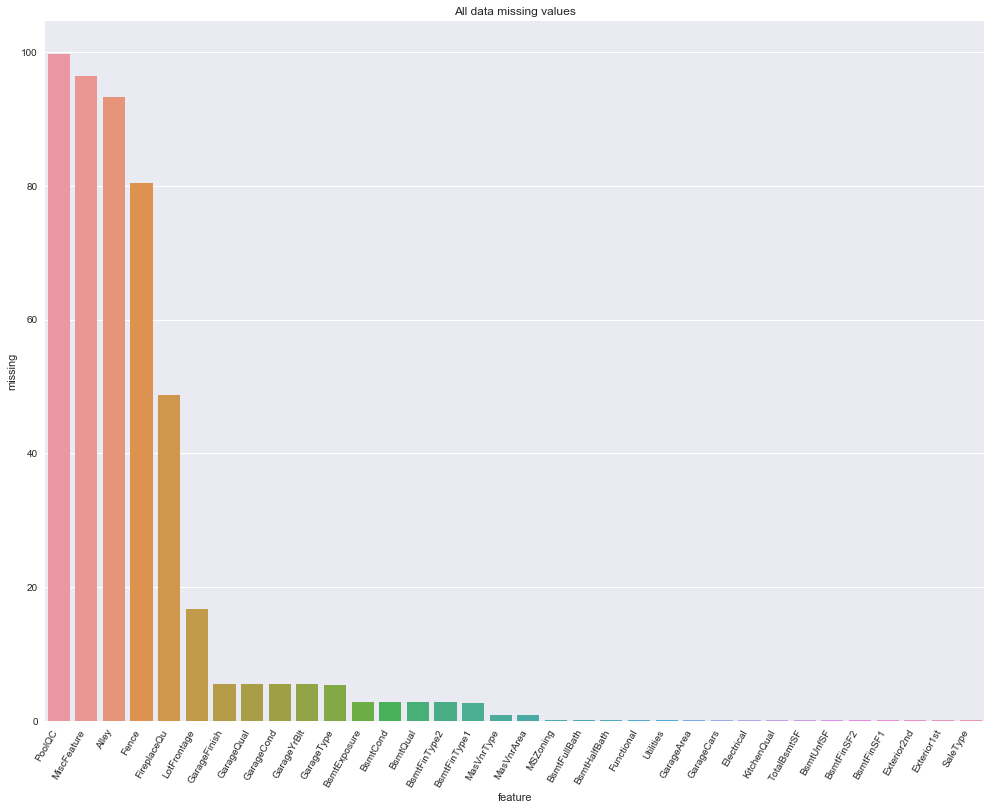

In [22]:
plt.figure(figsize=(15,12))
sns.barplot(data=ms_all,x='col',y='missing')
plt.xlabel('feature')
plt.xticks(rotation=60,ha='right')
plt.title('All data missing values')

In [23]:
missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    data[i] = data[i].fillna('None')

In [24]:
data['MSZoning'] = data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [25]:
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_val_col2:
    data[i] = data[i].fillna(0)

In [26]:
missing_col3 = ['Utilities',
               'Functional',
               'Exterior1st',
               'Exterior2nd',
               'Electrical',
               'KitchenQual',
               'SaleType']
for i in missing_col3:
    data[i] = data[i].fillna(data[i].mode()[0])

In [27]:
missing_per(data) # Can't find missing values

,col,missing


### box-cox Transformation
- How to make non-normalized normalized
- The reason for using boxcox1p is because Saleprice feature also used log1p

In [28]:
numeric_feats = data.dtypes[data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed = pd.DataFrame({'skew':skewed_feats}).sort_values(by='skew',ascending=False)
skewed.head()

,skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080


In [29]:
from scipy.special import boxcox1p
skewed = skewed[abs(skewed)>0.75]
lam = 0.15
for col in skewed.index:
    data[col] = boxcox1p(data[col],lam)

- Creating Derived Variable

In [30]:
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

data['YrBltAndRemod']=data['YearBuilt']+data['YearRemodAdd']

data['Total_sqr_footage'] = data['BsmtFinSF1'] +data['BsmtFinSF2'] + data['1stFlrSF'] + data['2ndFlrSF']

data['Total_Bathrooms'] =data['FullBath'] + (0.5 * data['HalfBath']) +data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath'])

data['Total_porch_sf'] = (data['OpenPorchSF'] + data['3SsnPorch'] +data['EnclosedPorch'] + data['ScreenPorch'] +data['WoodDeckSF'])

In [31]:
data['hasPool'] = data['PoolArea'].apply(lambda x: 1 if x>0 else 0)
data['hasFireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
data.drop('Fireplaces',axis=1,inplace=True)
data['hasGarage'] = data['GarageArea'].apply(lambda x: 1 if x>0 else 0)
data.drop('GarageArea',axis=1,inplace=True)
data['hasBsmt'] = data['TotalBsmtSF'].apply(lambda x: 1 if x>0 else 0)
data['has2ndfloor'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

In [32]:
data.drop(['PoolQC','Utilities','Street'],axis=1,inplace=True)

- feature processing

In [33]:
col = ['MSSubClass','OverallCond','YrSold','MoSold']
for i in col:
    data[i] = data[i].astype(str)

In [34]:
from sklearn.preprocessing import LabelEncoder
cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']
# LabelEncoder to categorical features
le = LabelEncoder()
for i in cols:
    data[i] = le.fit_transform(data[i].values)

In [35]:
final_data = pd.get_dummies(data).reset_index(drop=True)
print('Final data size is {}'.format(final_data.shape))

Final data size is (2917, 225)


In [36]:
train_x = final_data[:ntrain]
test_x = final_data[ntrain:]

In [37]:
def overfit_reducer(df):
    overfit=[]
    for i in df.columns:
        counts = df[i].value_counts().iloc[0]
        if counts/len(df) * 100 >99.9:
            overfit.append(i)
        else:
            continue
    return list(overfit)

In [38]:
overfit_features = overfit_reducer(train_x)
train_x.drop(overfit_features,axis=1,inplace=True)
test_x.drop(overfit_features,axis=1,inplace=True)

# Modeling

In [39]:
from sklearn.model_selection import KFold,cross_val_score
def rmsle_cv(model):
    n_fold = 5
    kf = KFold(n_fold, shuffle=True,random_state=42).get_n_splits(train_x)
    rmse = np.sqrt(-cross_val_score(model,train_x.values,train_y,scoring='neg_mean_squared_error',cv=kf))
    return rmse

In [40]:
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from lightgbm.sklearn import LGBMRegressor

Lasso and Ridge may be very sensitive outliers. So we need to use RobustScaler.

RobustScaler makes the median to be 0 and the IQR to be 1.

In [41]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

In [42]:
alpha_las=[0.0005,0.0001,0.00005,0.00001]
e_ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [43]:
lasso = make_pipeline(RobustScaler(),LassoCV(alphas=alpha_las,random_state=42,max_iter=1e7))
ridge = make_pipeline(RobustScaler(),RidgeCV(alphas = alpha_las))
elastic = make_pipeline(RobustScaler(),ElasticNetCV(max_iter=1e7,alphas=alpha_las,l1_ratio = e_ratio))

In [44]:
krr = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
rf = RandomForestRegressor(bootstrap=True,max_depth=70,max_features='auto',min_samples_leaf=4,min_samples_split=10,n_estimators=2200)
gra = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
lgbm = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

Calculate the RMSE score of the model for weight adjustment.

In [45]:
model = [lasso,ridge,elastic,krr,rf,gra,xgb,lgbm]
model_name = ['Lasso','Ridge','ElasticNet','KernelRidge','RandomForest','GradientBoost','XGBoost','LGBM']
for i,j in zip(model,model_name):
    print('{} rmse socre is {}'.format(j,rmsle_cv(i).mean()))

Lasso rmse socre is 0.11285137449325174
Ridge rmse socre is 0.12369331112554442
ElasticNet rmse socre is 0.11267980485641582
KernelRidge rmse socre is 0.11781442034329592
RandomForest rmse socre is 0.14034678619060445
GradientBoost rmse socre is 0.11461910869667039
XGBoost rmse socre is 0.11730900303993182
LGBM rmse socre is 0.11461873084538088


ElasticNet model has best score followed by Lasso,Gradient Boost.

And RandomForest model has worst score therefore I don't select this model.

If you want to know StackingCVRegressor, you will refer to [http://rasbt.github.io/mlxtend/user_guide/regressor/StackingCVRegressor/](http://)

In [46]:
# conda prompt 에서 설치
from mlxtend.regressor import StackingCVRegressor
stack = StackingCVRegressor(regressors=(ridge,lasso,krr,gra,xgb,lgbm),
                           meta_regressor=elastic,use_features_in_secondary=True)

In [47]:
rmsle_cv(stack).mean()

0.1154862069263134

모델 모두 fit하고 가중치 준 blended_model_predict 함수 생성 후 predict(trian_x) 하고 점수 확인

if 별로면 blended 안쓰고 predict(train_x)한다. 여기서 점수 확인 후 가중치 다시 주고 predict(test_x)

아님 쏵 다 제출 blended_model_predict(test_x)도 제출

- 그 전에 모델의 rmsle 점수 뽑아서 predict(train_x) rmsle 모델 결합 가중치 조정(blend model)
- train에서 rmsle 점수 뽑아내고 그 담에 predict(test_x)해서 가중치 비율 조정 후 submit

In [48]:
rid_fit = ridge.fit(train_x,train_y)
lasso_fit = lasso.fit(train_x,train_y)
elastic_fit = elastic.fit(train_x,train_y)
krr_fit = krr.fit(train_x,train_y)
gra_fit = gra.fit(train_x,train_y)
xgb_fit = xgb.fit(train_x,train_y)
lgbm_fit = lgbm.fit(train_x,train_y)

In [49]:
stack_fit = stack.fit(np.array(train_x),np.array(train_y))

In [50]:
from sklearn.metrics import mean_squared_error
def rmsle(y,pred_y):
    return np.sqrt(mean_squared_error(y,pred_y))

In [51]:
test_y=submission['SalePrice']

#### Method 1
- Blended_model

Lasso rmse socre is 0.11285137449325174 - 2 0.2

Ridge rmse socre is 0.12369331428588932 - 8 0.05

ElasticNet rmse socre is 0.1127704857393996 - 1 0.2

KernelRidge rmse socre is 0.11781442034338312 - 7 0.05

GradientBoost rmse socre is 0.11461781335632337 - 3 0.15

XGBoost rmse socre is 0.11627725614277351 - 5 0.1

LGBM rmse socre is 0.1146187308453809 - 4 0.15

Stacking 0.11651581352006143 - 6 0.1

In [52]:
def blended_model_predict(X):
    return ((0.2 * lasso_fit.predict(X))+(0.05*rid_fit.predict(X))+(0.2*elastic_fit.predict(X))+(0.05*krr_fit.predict(X))+
           (0.15*gra_fit.predict(X))+(0.1*xgb_fit.predict(X))+ (0.15*lgbm_fit.predict(X))+
            (0.1*stack_fit.predict(np.array(X))))
    

In [53]:
print('Blended model score is {:.5f}'.format(rmsle(train_y,blended_model_predict(train_x))))
blend=[]
blend.append(rmsle(train_y,blended_model_predict(train_x)))

Blended model score is 0.07857


In [54]:
test_id = submission['Id']
test_price_blend = np.expm1(blended_model_predict(test_x))
tmp_blend = pd.DataFrame(columns=['Id','SalePrice'])
tmp_blend['Id'] = test_id
tmp_blend['SalePrice'] = test_price_blend

In [55]:
#tmp_blend.to_csv('blend_predict.csv',index=False)
# 0.11722 score

#### Method 2
- Each model prediction

In [56]:
fit_model = [ridge,lasso,elastic,krr,gra,xgb,lgbm]
fit_model_name = ['Ridge','Lasso','ElasticNet','KernelRidge','GradientBoost','XGBoost','LGBM']
tmp = pd.DataFrame(columns=['model','score'])
idx=0
for i,j in zip(fit_model,fit_model_name):
    pred_y = i.predict(train_x)
    print('{} model score is {:.5f}'.format(j,rmsle(train_y,pred_y)))
    tmp.loc[idx,'model'] = j
    tmp.loc[idx,'score'] = rmsle(train_y,pred_y)
    idx+=1
pred_stack = stack.predict(np.array(train_x))
print('Stacking model score is {:.5f}'.format(rmsle(train_y,pred_stack)))
tmp.loc[idx,'model'] = 'Stack'
tmp.loc[idx,'score'] = rmsle(train_y,pred_stack)
tmp.sort_values(by='score',ascending=True)

Ridge model score is 0.09537
Lasso model score is 0.10234
ElasticNet model score is 0.10111
KernelRidge model score is 0.07379
GradientBoost model score is 0.04858
XGBoost model score is 0.07914
LGBM model score is 0.07153
Stacking model score is 0.09154


,model,score
4,GradientBoost,0.0485757
6,LGBM,0.0715266
3,KernelRidge,0.0737867
5,XGBoost,0.0791447
7,Stack,0.091544
0,Ridge,0.0953743
2,ElasticNet,0.101114
1,Lasso,0.102343


In [57]:
mix_model = 0.7*np.expm1(gra.predict(test_x))+0.15*np.expm1(lgbm.predict(test_x))+0.15*np.expm1(krr.predict(test_x))

In [58]:
tmp_mix = pd.DataFrame()
tmp_mix['Id'] = test_id
tmp_mix['SalePrice'] = mix_model

In [59]:
#tmp_mix.to_csv('mix_predict.csv',index=False)
# 0.11998 score

- Method 3

All mixing model

In [60]:
final_model = 0.6*test_price_blend + 0.2*np.expm1(gra.predict(test_x)) +\
0.1*np.expm1(lgbm.predict(test_x))+0.1*np.expm1(krr.predict(test_x))

In [61]:
tmp_final = pd.DataFrame()
tmp_final['Id'] = test_id
tmp_final['SalePrice'] = final_model
#tmp_final.to_csv('final_predict.csv',index=False)